In [3]:
import seaborn as sns
%matplotlib inline

Seaborn ya viene con data sets que se pueden importar como tips

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<h3>DIST Plot</h3>
<p>The distplot shows the distribution of a univariate set of observations</p>
<p>El distplot muestra la distribución de un conjunto univariante de observaciones</p>

<AxesSubplot:xlabel='total_bill'>

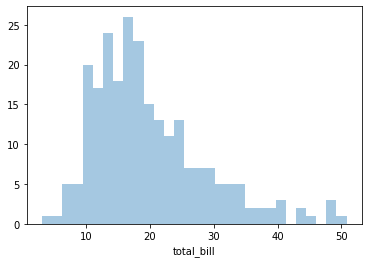

In [9]:
sns.distplot(tips['total_bill'], kde=False, bins=30) # Le paso un DF indicando una columna
# kde y bins son opcionales

<h3>JOINT Plot</h3>
<p>jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:</p>
<p>jointplot() le permite básicamente comparar dos distplots para datos bivariados. Con su elección de qué tipo de parámetro para comparar:</p>

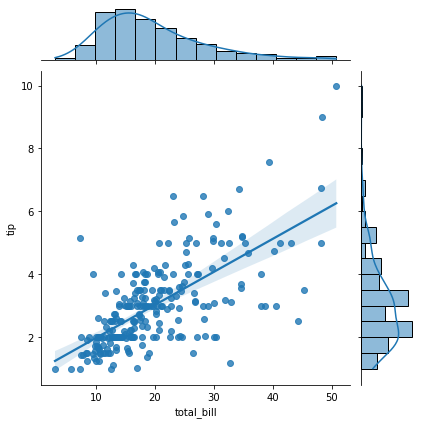

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')
# kind es opcional. hex - reg - kde
# Muestra la relacion entre total_bill y tip

<h3>PAIR Plot</h3>
<p>pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).</p>
<p>pairplot trazará las relaciones entre pares en todo un marco de datos (para las columnas numéricas) y admite un argumento de color (para las columnas categóricas).</p>

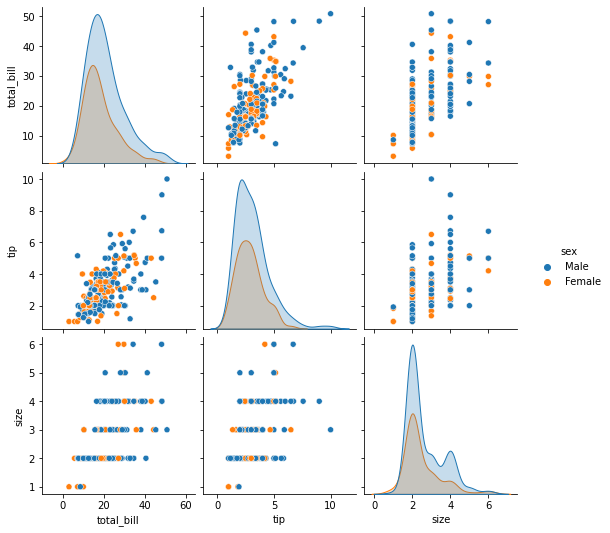

In [14]:
sns.pairplot(tips, hue='sex')
# hue es opcional

<h3>RUG Plot</h3>
<p>rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:</p>
<p>Los rugplots son en realidad un concepto muy simple, simplemente dibujan una marca de guiones para cada punto de una distribución univariante. Son el bloque de construcción de un gráfico KDE:</p>

<AxesSubplot:xlabel='total_bill'>

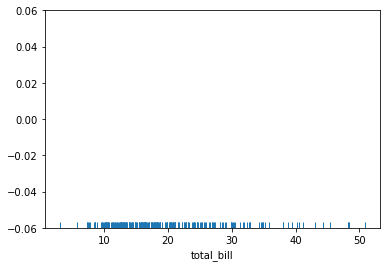

In [15]:
sns.rugplot(tips['total_bill'])

<h3>KDE Plot</h3>
<p>KDE : Kernel density estimation</p>
<p>These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.</p>
<p>Estos gráficos KDE sustituyen cada observación por una distribución gaussiana (normal) centrada en ese valor.</p>


(0.0, 1.0)

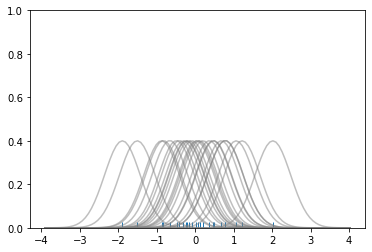

In [16]:
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

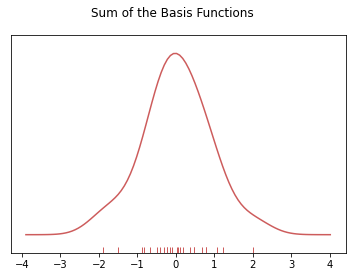

In [17]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")